# Saving to file

It's often helpful to save our figures to a file that we can use in reports or presentations. Having code that produces the figure file automatically helps to ensure that you're able to reproduce your figure if you need a minor change. For example, if you realize you have a type on the axis label, or your data changes and you need to rerun the plot with slightly different input data. Having code that both creates and saves your figure. Let's take the code we just made and add a line to save it to a file using the `savefig` method, which we apply to the figure we wish to save. Saving to a file is quite simplem just call the `savefig()` command on the figure that you'd like to save and input the output file path that you'd like to save to. For example, if we wanted to save our figure to a '.png' file in our `img/` directory (which is in our local directory, or we'd need the full file path), all we need to do is call `fig.savefig('img/myfile.png')` and we'll get a file output.

Let's apply this below and include one additional keyword argument for our `savefig()` command: `dpi=300` which we'll discuss after we see the output.

In [1]:
# Optional command to make the figures high resolution
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

# Create noise-free data
maxval = 2 * np.pi
x_model = np.linspace(0, maxval, 1000)
f = lambda x: np.sin(x) * x
y_model = f(x_model)

# Create noisy data
x_data = np.random.rand(25) * maxval
y_data = f(x_data) + np.random.randn(*x_data.shape) * 0.5

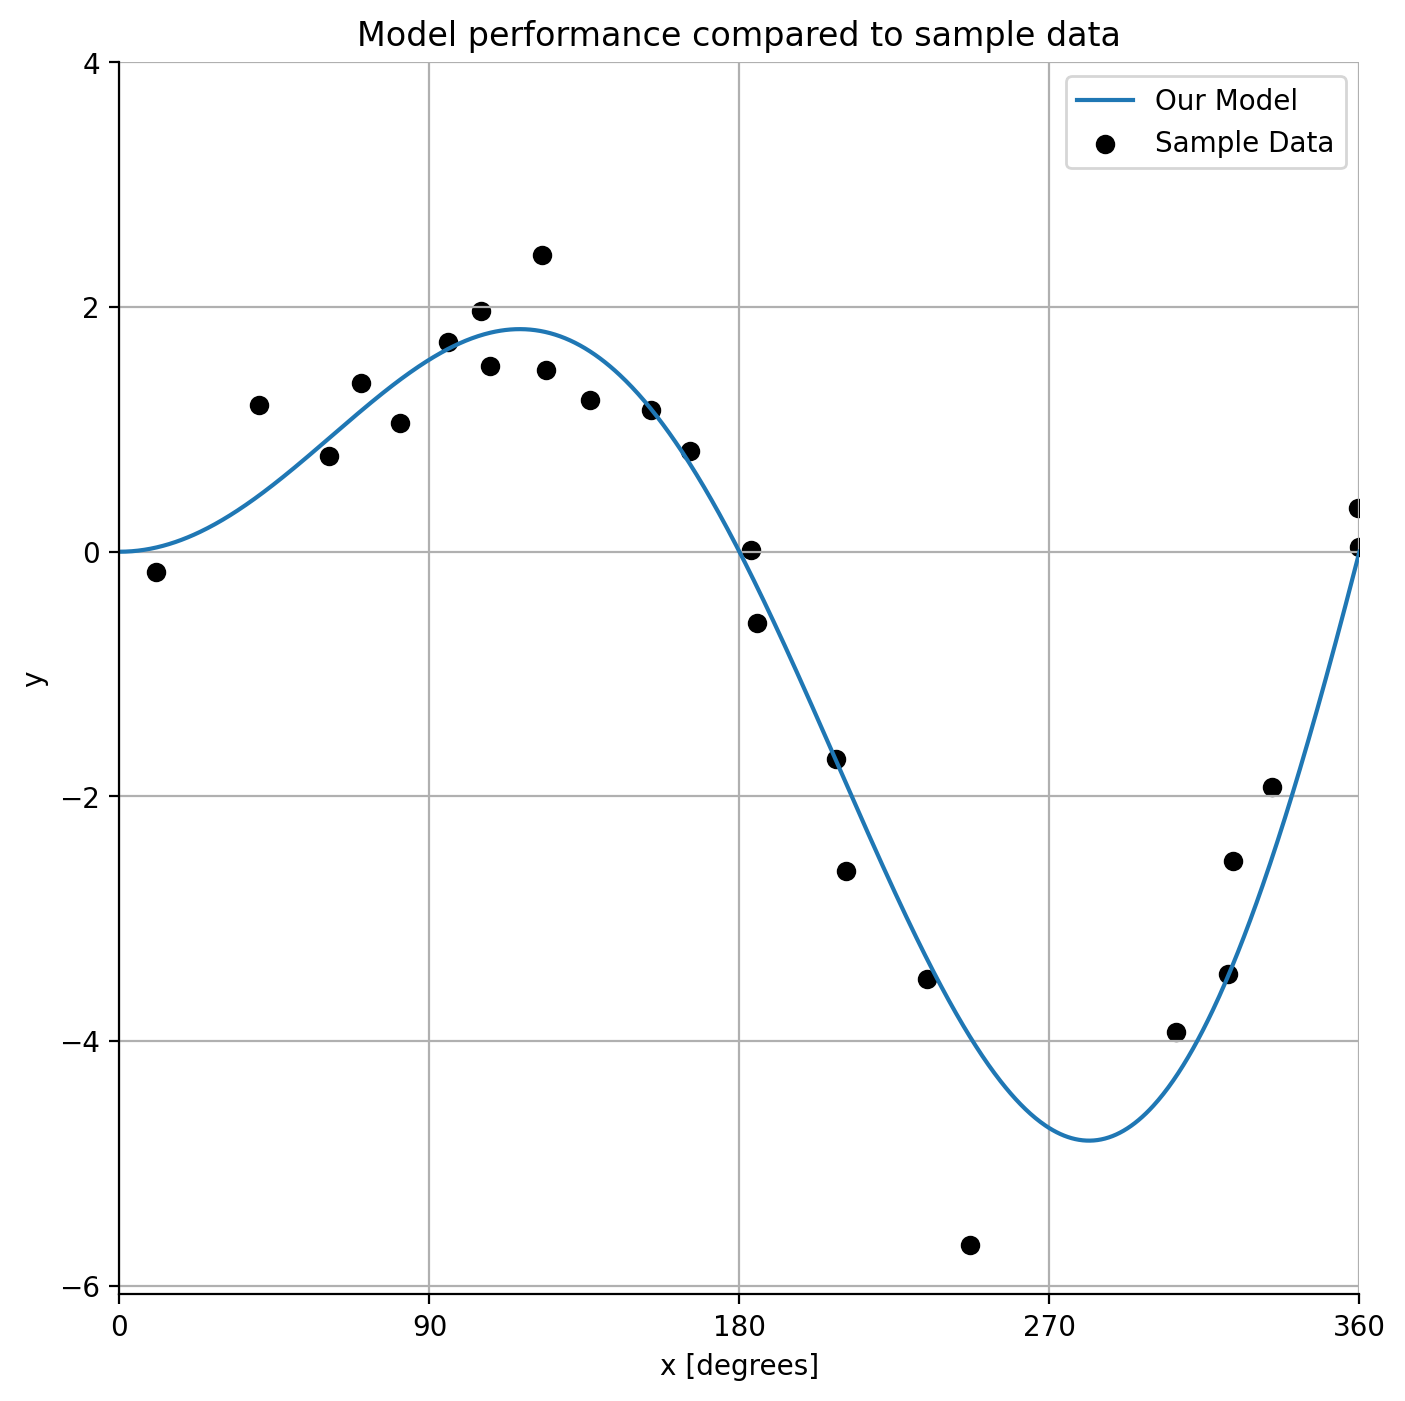

In [2]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_model, y_model, label="Our Model")
ax.scatter(x_data, y_data, color="black", label="Sample Data")
ax.set_xlabel("x [degrees]")
ax.set_ylabel("y")
ax.set_xticks([0, np.pi / 2, np.pi, 3 / 2 * np.pi, 2 * np.pi])
ax.set_xticklabels([0, 90, 180, 270, 360])
ax.set_yticks([-6, -4, -2, 0, 2, 4])
ax.set_xlim([0, 2 * np.pi])
ax.grid(True)
ax.legend()
ax.set_title("Model performance compared to sample data")
ax.spines[["right", "top"]].set_visible(False)
plt.show()

# This line saves the figure to a png file
fig.savefig("img/myfigure_lower.png", dpi=300)

There are two parameters that are worth considering. The most important is `fname`, the filename or path to save it to. In the example above, we saved the image to the `img/` folder with the filename `myfigure.png`. The PNG format will be the standard format to save your image to, there are many other options that may be available to you, such as PDF, SVG, EPS, and PS. By changing the file extension (e.g. `myfigure.pdf`), the figure will be saved in that format. If no extension is given to the file name, then it will be saved as a PNG.

You can get a full list of supported filetypes for your system by running the command:

In [3]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

As we can see - there are lots of options!

The other parameter worth noting is `dpi` which stands for dots per square inch. This is the resolution of the figure. The higher the dpi, the higher quality the figure will look. For example, if we save the above figure at a resolution of 10 dpi, we get this:

![Low dpi image](img/myfigure_low.png)

And you can see we really can't read it because the image is far too small. The file size, however, is only 2 kb. If we set the dpi to 1000 instead, we get a 700 kb with ample resolution for most purposes:

![High dpi image](img/myfigure_high.png)

As a general rule, we would recommend between 300 and 600 dpi for most figures so that they're legible, but not overly large.

## What if my saved plot is cut off?
Sometimes, you may find that if you have a particularly long set of text that runs off to the side of your figure, your saved figure may cut some of it off. In such cases, what often helps is setting the keyword argument `bbox_inches = 'tight'`. Instead of assigning a general border of whitespace around the Axes object, matplotlib tries to determine a tight fitting bounding box around your figure content whehn `bbox_inches` is set to 'tight'. As a general rule, using the command `savefig(my_figure_path, dpi=300, bbox_inches = 'tight')` should cleanly save the file for you if you find that some of your plot is cut off when you save to a figure.